## Importing packages and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as seabornInstance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('C:/Users/Choug/Desktop/DATA ANALYTICS/candy-data.csv')

## Exploring the distribution of Categorical Variables


In [4]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [5]:
reg = df[['winpercent', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
               'hard', 'bar', 'pluribus']]

In [6]:
reg

,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,66.971725,1,0,1,0,0,1,0,1,0
1,67.602936,1,0,0,0,1,0,0,1,0
2,32.261086,0,0,0,0,0,0,0,0,0
3,46.116505,0,0,0,0,0,0,0,0,0
4,52.341465,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
80,45.466282,0,1,0,0,0,0,0,0,0
81,39.011898,0,1,0,0,0,0,1,0,0
82,44.375519,0,1,0,0,0,0,0,0,1
83,41.904308,0,0,1,0,0,0,1,0,0


In [7]:
df.isnull().any()

competitorname      False
chocolate           False
fruity              False
caramel             False
peanutyalmondy      False
nougat              False
crispedricewafer    False
hard                False
bar                 False
pluribus            False
sugarpercent        False
pricepercent        False
winpercent          False
dtype: bool

## Exploring Pricepercent, Sugarpercent and Winpercent

In [8]:
reg.sort_values(['winpercent'], ascending=False)

,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
52,84.180290,1,0,0,1,0,0,0,0,0
51,81.866257,1,0,0,1,0,0,0,0,0
79,81.642914,1,0,1,0,0,1,0,1,0
28,76.768600,1,0,0,0,0,1,0,1,0
64,76.673782,1,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
26,28.127439,0,1,0,0,0,0,1,0,1
72,27.303865,0,1,0,0,0,0,0,0,0
12,24.524988,0,1,0,0,0,0,0,0,1
7,23.417824,0,0,0,1,0,0,0,0,1


In [9]:
# Average value of Winpercent:

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


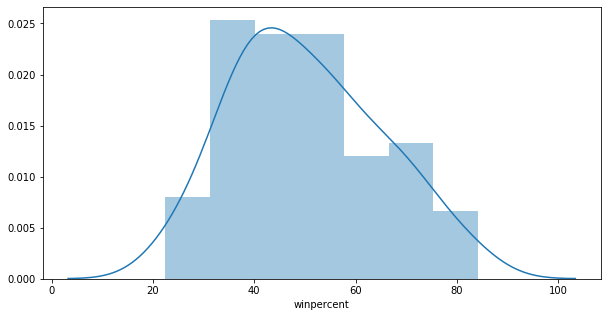

In [11]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(reg['winpercent'])

## Exploring the correlation structure and linear regression

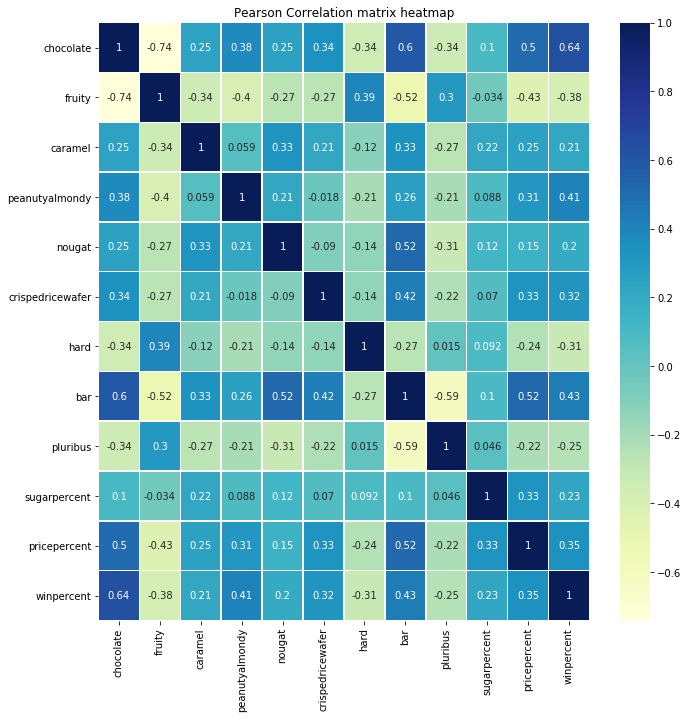

In [12]:
fig, ax = plt.subplots(figsize=(11,11));
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=.5, cmap = "YlGnBu");
plt.xlabel('');
plt.ylabel('');
plt.title('Pearson Correlation matrix heatmap');

In [13]:
y, X = dmatrices('winpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus', data=reg, return_type='dataframe')

In [14]:
y[:3]

,winpercent
0,66.971725
1,67.602936
2,32.261086


In [15]:
X[:3]

,Intercept,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
mod = sm.OLS(y, X)

In [17]:
res = mod.fit()

In [18]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     8.842
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           6.05e-09
Time:                        11:43:52   Log-Likelihood:                -317.92
No. Observations:                  85   AIC:                             655.8
Df Residuals:                      75   BIC:                             680.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           35.0155      4.078  

In [19]:
res.params

Intercept           35.015459
chocolate           19.905795
fruity              10.267732
caramel              3.384282
peanutyalmondy      10.141017
nougat               2.416252
crispedricewafer     8.991549
hard                -4.872560
bar                 -0.721966
pluribus            -0.159917
dtype: float64

In [20]:
# Evaluating a linear Model

In [21]:
# Y = mx + C       Checking with Peanuts M&M's winpercent (69.48)

In [22]:
# Winpercent = 35.0155 + (19.905*chocolate + 10.267*fruity + 3.384*caramel + 10.141*peanutyalmondy + 2.416*nougat + 8.991*crispedricewafer + -4.872*Hard + -0.722*Bar + -0.159*Pluribus)

In [23]:
Y = 35.0155 + (19.905 + 10.141 -0.159)

In [24]:
Y

64.9025

In [25]:
#Close enough with Peanuts M&M's original winpercent value

In [26]:
#Checking the overall average winpercent and average winpercent for different ingredients

In [27]:
choc = df.loc[df.chocolate==1, :]

In [28]:
choc.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037


In [29]:
choc.chocolate.count()

37

In [30]:
choc.winpercent.mean()

60.9215294054054

In [31]:
df.winpercent.mean()

50.316763811764716

In [53]:
Nochoc = df.loc[df.chocolate==0, :]

In [54]:
Nochoc.winpercent.mean()

42.142257

In [32]:
car = df.loc[df.caramel==1, :]

In [33]:
car.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681
35,Milk Duds,1,0,1,0,0,0,0,0,1,0.302,0.511,55.064072
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556


In [34]:
car.winpercent.mean()

57.34690771428571

In [63]:
Nocar = df.loc[df.caramel==0, :]

In [64]:
Nocar.winpercent.mean()

48.93053825352113

In [35]:
nou = df.loc[df.nougat==1, :]

In [36]:
nou.winpercent.mean()

60.05187942857143

In [61]:
Nonou = df.loc[df.nougat==0, :]

In [62]:
Nonou.winpercent.mean()

49.44309958974358

In [37]:
pea = df.loc[df.peanutyalmondy==1, :]

In [38]:
pea.winpercent.mean()

63.69713678571429

In [55]:
Nopea = df.loc[df.peanutyalmondy==0, :]

In [56]:
Nopea.winpercent.mean()

47.67838040845071

In [39]:
crisp = df.loc[df.crispedricewafer==1, :]

In [40]:
crisp.winpercent.mean()

66.170252

In [57]:
Nocrisp = df.loc[df.crispedricewafer==0, :]

In [58]:
Nocrisp.winpercent.mean()

48.894014871794866

In [41]:
bar = df.loc[df.bar==1, :]

In [42]:
bar.winpercent.mean()

61.29541261904762

In [65]:
Nobar = df.loc[df.bar==0, :]

In [66]:
Nobar.winpercent.mean()

46.714394671875

In [43]:
hard = df.loc[df.hard==1, :]

In [44]:
hard.winpercent.mean()

40.5089818

In [72]:
Nohard = df.loc[df.hard==0, :]

In [74]:
Nohard.winpercent.mean()

52.418431385714285

In [45]:
pluri = df.loc[df.pluribus==1, :]

In [46]:
pluri.winpercent.mean()

46.822780818181826

In [68]:
Nopluri = df.loc[df.pluribus==0, :]

In [69]:
Nopluri.winpercent.mean()

54.06640409756098

In [47]:
Fruit = df.loc[df.fruity==1, :]

In [48]:
Fruit.winpercent.mean()

44.11974142105264

In [50]:
NoFruit = df.loc[df.fruity==0, :]

In [51]:
NoFruit.winpercent.mean()

55.32712234042553

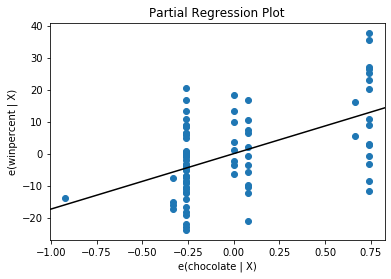

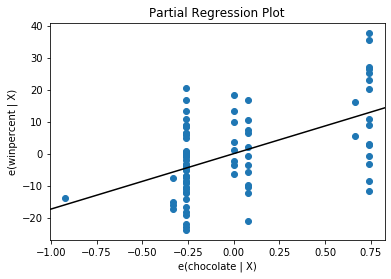

In [49]:
sm.graphics.plot_partregress('winpercent', 'chocolate', ['bar', 'caramel'],
   ....:                              data=df, obs_labels=False)